<a href="https://colab.research.google.com/github/Maheshkumarcseb/Machine_learning/blob/main/mask_detections_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of kaggke.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 97% 159M/163M [00:01<00:00, 163MB/s]
100% 163M/163M [00:01<00:00, 154MB/s]


In [4]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
# listing directories
!ls


data  face-mask-dataset.zip  kaggle.json  sample_data


Import the dependies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1318.jpg', 'with_mask_2953.jpg', 'with_mask_294.jpg', 'with_mask_3394.jpg', 'with_mask_2773.jpg']
['with_mask_3334.jpg', 'with_mask_398.jpg', 'with_mask_406.jpg', 'with_mask_666.jpg', 'with_mask_228.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1121.jpg', 'without_mask_1672.jpg', 'without_mask_2950.jpg', 'without_mask_2846.jpg', 'without_mask_95.jpg']
['without_mask_1583.jpg', 'without_mask_3485.jpg', 'without_mask_2384.jpg', 'without_mask_3484.jpg', 'without_mask_3715.jpg']


In [9]:
print('number of mask images:',len(with_mask_files))
print('number of without mask images:',len(without_mask_files))

number of mask images: 3725
number of without mask images: 3828


creating labels for the two class of images

with mask--> 1
without mask --> 0

In [10]:
# create the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the images

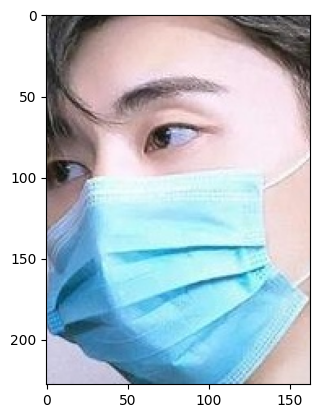

In [15]:
# displaying the mask images

img=mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

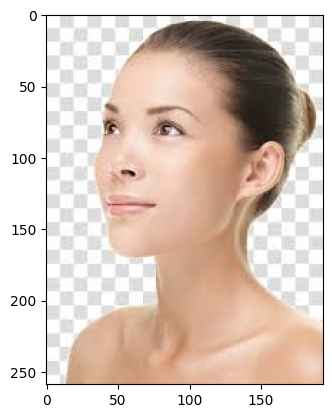

In [16]:
# displaying the  without mask images

img=mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image processing

1.resize the images

2.convert the images to numpy arrays

In [17]:
# convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'

data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image=image.convert('RGB')
  image = np.array(image)
  data.append(image)





without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image=image.convert('RGB')
  image = np.array(image)
  data.append(image)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
type(data)

list

In [19]:
len(data)

7553

array([[[100,  67,  34],
        [100,  67,  34],
        [100,  67,  34],
        ...,
        [ 85,  56,  24],
        [ 82,  54,  22],
        [ 81,  55,  22]],

       [[104,  71,  38],
        [104,  71,  38],
        [104,  71,  38],
        ...,
        [ 85,  56,  24],
        [ 82,  54,  22],
        [ 81,  55,  22]],

       [[103,  70,  37],
        [103,  70,  37],
        [103,  70,  37],
        ...,
        [ 85,  56,  24],
        [ 82,  54,  22],
        [ 81,  55,  22]],

       ...,

       [[  5,   3,   4],
        [  5,   3,   4],
        [  6,   4,   5],
        ...,
        [  3,   1,   2],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[  5,   3,   4],
        [  5,   3,   4],
        [  6,   4,   5],
        ...,
        [  3,   1,   2],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[  5,   3,   4],
        [  5,   3,   4],
        [  6,   4,   5],
        ...,
        [  3,   1,   2],
        [  3,   3,   3],
        [  3,   3,   3]]], dtype=uint8)
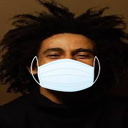

In [20]:
data[0]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
## converting image list and label list to numpy arrays
x=np.array(data)
y=np.array(labels)

In [24]:
type(x)

numpy.ndarray

In [25]:
type(y)

numpy.ndarray

In [27]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [28]:
print(y)

[1 1 1 ... 0 0 0]


Train Test split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
print(x.shape,x_train.shape,x_test.shape)



(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [31]:
# scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

array([[[202, 202, 204],
        [201, 202, 204],
        [203, 203, 205],
        ...,
        [188, 189, 191],
        [187, 188, 190],
        [187, 188, 190]],

       [[201, 202, 204],
        [201, 202, 204],
        [202, 202, 204],
        ...,
        [187, 188, 190],
        [187, 188, 190],
        [187, 188, 190]],

       [[202, 202, 204],
        [202, 202, 204],
        [202, 202, 204],
        ...,
        [186, 187, 189],
        [186, 187, 189],
        [186, 187, 189]],

       ...,

       [[119, 114, 107],
        [121, 116, 110],
        [120, 116, 110],
        ...,
        [120, 120, 120],
        [119, 119, 118],
        [117, 117, 117]],

       [[119, 115, 105],
        [119, 114, 106],
        [119, 115, 106],
        ...,
        [118, 118, 117],
        [117, 117, 115],
        [117, 117, 116]],

       [[118, 114, 104],
        [117, 113, 105],
        [118, 113, 106],
        ...,
        [115, 115, 114],
        [115, 115, 113],
        [116, 116, 115]]], dtype=uint8)
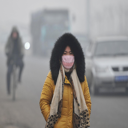

In [32]:
x_train[0]

In [33]:
x_train_scaled[0]

array([[[0.79215686, 0.79215686, 0.8       ],
        [0.78823529, 0.79215686, 0.8       ],
        [0.79607843, 0.79607843, 0.80392157],
        ...,
        [0.7372549 , 0.74117647, 0.74901961],
        [0.73333333, 0.7372549 , 0.74509804],
        [0.73333333, 0.7372549 , 0.74509804]],

       [[0.78823529, 0.79215686, 0.8       ],
        [0.78823529, 0.79215686, 0.8       ],
        [0.79215686, 0.79215686, 0.8       ],
        ...,
        [0.73333333, 0.7372549 , 0.74509804],
        [0.73333333, 0.7372549 , 0.74509804],
        [0.73333333, 0.7372549 , 0.74509804]],

       [[0.79215686, 0.79215686, 0.8       ],
        [0.79215686, 0.79215686, 0.8       ],
        [0.79215686, 0.79215686, 0.8       ],
        ...,
        [0.72941176, 0.73333333, 0.74117647],
        [0.72941176, 0.73333333, 0.74117647],
        [0.72941176, 0.73333333, 0.74117647]],

       ...,

       [[0.46666667, 0.44705882, 0.41960784],
        [0.4745098 , 0.45490196, 0.43137255],
        [0.47058824, 0

Building a convulation neural networks

In [34]:
import tensorflow as tf
from tensorflow import keras


In [37]:
import tensorflow as tf
from tensorflow import keras

no_of_classes = 2
model=keras.Sequential()

# Corrected the argument name from 'kernal_size' to 'kernel_size'
model.add(keras.layers.Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# Corrected the argument name from 'kernal_size' to 'kernel_size'
model.add(keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(no_of_classes,activation='sigmoid'))

In [38]:
# compile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [39]:
# training the neural network
history =model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 173s 995ms/step - acc: 0.6619 - loss: 0.7453 - val_acc: 0.8777 - val_loss: 0.3130
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - acc: 0.8765 - loss: 0.2974 - val_acc: 0.8975 - val_loss: 0.2544
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - acc: 0.9047 - loss: 0.2432 - val_acc: 0.9074 - val_loss: 0.2369
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 170s 978ms/step - acc: 0.9205 - loss: 0.2075 - val_acc: 0.8992 - val_loss: 0.2861
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 192s 920ms/step - acc: 0.9350 - loss: 0.1808 - val_acc: 0.9091 - val_loss: 0.2241


Model Evaluation

In [40]:
loss, accuracy = model.evaluate(x_test_scaled,y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 266ms/step - acc: 0.9160 - loss: 0.2157
Test Accuracy = 0.9232296347618103


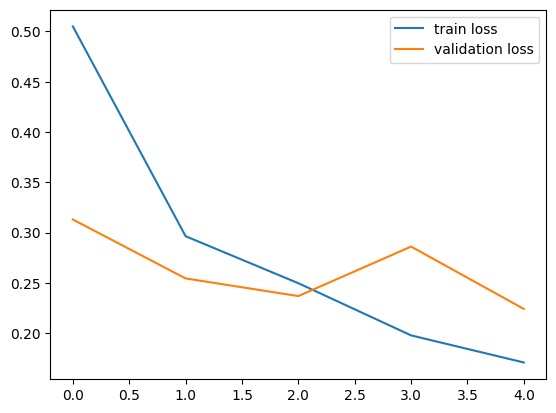

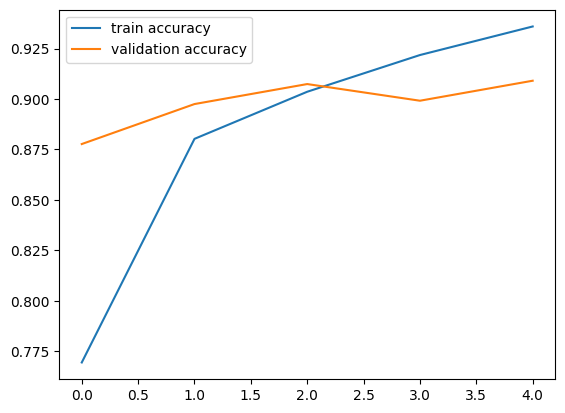

In [41]:
h=history

# plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()


# plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

Preditive system

path of the image to be predicted/content/test1.jpeg


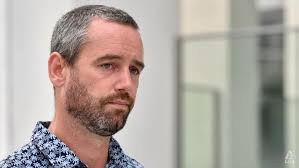

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.5443691 0.4297777]]
0
the person is not wearing mask


In [43]:
input_image_path= input('path of the image to be predicted')
input_image =cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image,(128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label==0:
  print('the person is not wearing mask')
elif input_pred_label==1:
  print('the person is  wearing mask')

